# Worksheet

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 |   |   |   |   |
| B |   | 0 |   |   |   |
| C |   |   | 0 |   |   |
| D |   |   |   | 0 |   |
| E |   |   |   |   | 0 |

Step 2

|   |   |   |   |   |
|---|---|---|---|---|
|   | 0 |   |   |   |
|   |   | 0 |   |   |
|   |   |   | 0 |   |
|   |   |   |   | 0 |

Step 3

|   |   |   |   |
|---|---|---|---|
|   | 0 |   |   |
|   |   | 0 |   |
|   |   |   | 0 |

Step 4

|   |   |   |
|---|---|---|
|   | 0 |   |
|   |   | 0 |

## Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

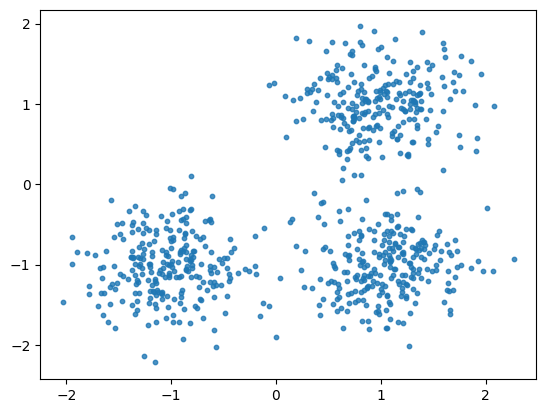

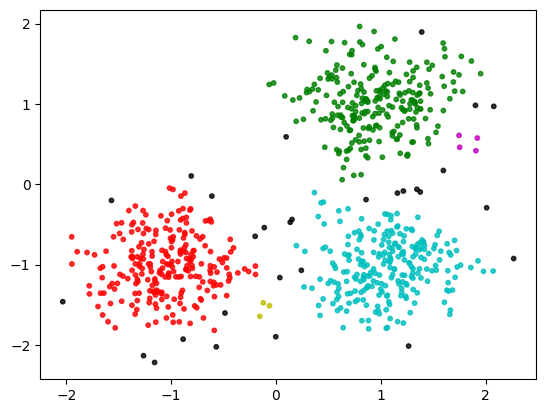

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.n_points = dataset.shape[0]


    def _region_query(self, point_id):
        """Finds neighbors within epsilon."""
        neighbors = []
        for i in range(self.n_points):
            if np.linalg.norm(self.dataset[point_id] - self.dataset[i]) < self.epsilon:
                neighbors.append(i)
        return neighbors

    def dbscan(self):

       labels = np.zeros(self.n_points, dtype=int)
       cluster_id = 0

       for point_id in range(self.n_points):
            if labels[point_id] != 0:
                continue

            neighbors = self._region_query(point_id)

            if len(neighbors) < self.min_pts:
                labels[point_id] = -1  # Noise
                continue

            cluster_id += 1
            labels[point_id] = cluster_id

            seed_set = neighbors[:]
            seed_set.remove(point_id)

            i = 0
            while i < len(seed_set):
                neighbor_id = seed_set[i]

                if labels[neighbor_id] == -1:
                    labels[neighbor_id] = cluster_id
                if labels[neighbor_id] != 0:
                    i += 1
                    continue

                labels[neighbor_id] = cluster_id
                new_neighbors = self._region_query(neighbor_id)

                if len(new_neighbors) >= self.min_pts:
                    seed_set.extend(x for x in new_neighbors if x not in seed_set)
                i += 1
       return labels

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()